In [8]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

from rampds.fe_utils.utils import FileUtils

# v3

- v2 OpenFE setup
- Test 2, 3 and 4 LGBMs in blend vs single one
- Times should be more accurate because I removed the cache before

In [9]:
datasets = [
    "concrete_strength",
    "rainfall", 
    "wine_quality",
    "employee_attrition",
    "blueberry_yield",
    "heat_flux",
    "abalone",
    "mohs_hardness", 
    "crab_age",
    "housing_price_california",
    "influencer",
    "cirrhosis_outcomes",
    "sticker_sales",
    "reservation_cancellation",
    "obesity_risk",
    "loan_approval",
    "calorie_expenditure",
    "credit_fusion",
    "bank_churn",
    "failure",
    "unknown_a",
    "horse_survival", 
    "media_cost",
    "smoking",
    "mercedes_testing_time",
    "insurance_claim",
    "synthanic",
    "mental_health",
    "flood_probability",
    "insurance_premium",
    "covertype",
    "loan_loss",
]

In [10]:
def get_base_paths(data_name, versions_list):
    kaggle_name = f"kaggle_{data_name}"
    base_path = pathlib.Path("../openfe_experiments")

    paths = [base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search_{version}" / kaggle_name for version in versions_list]
    return paths

In [11]:
def get_both_plots(path_list):
    plots_file = "openfe_scores_plot.png"
    plots_path = [str(path / plots_file) for path in path_list]

    return plots_path

def get_both_metadata(path_list):
    metadata_file = "experiment_metadata.json"
    metadata_path = [path / metadata_file for path in path_list]
    metadata_list = [FileUtils.load_json(path) for path in metadata_path]

    return metadata_list

In [12]:
def compare_plots(data_name, obj_direction, plots_path_list, titles_list, figsize=(16, 10), fontsize=9):
    """
    Display two plots side by side for comparison.
    
    Args:
        data_name: Name of the dataset
        figsize: Figure size as (width, height)
    """

     # Load and display the images
    try:
        images = [mpimg.imread(plot_path) for plot_path in plots_path_list]
    except FileNotFoundError as e:
        print(f"Error loading images: {e}")
        return
    
    display(Markdown(f"## OpenFE {data_name} - objective direction: {obj_direction}"))
    
    n_plots = len(images)
    # Create figure with subplots
    fig, ax_list = plt.subplots(1, n_plots, figsize=figsize)

    for ax, img, title in zip(ax_list, images, titles_list):
        ax.imshow(img)
        ax.set_title(f"{title}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()


def compare_execution_times(data_name, metadata_list, titles_list, figsize=(16, 6)):
    # times in minutes
    times = [metadata["total_time_seconds"] / 60 for metadata in metadata_list]

    fig, ax = plt.subplots(figsize=figsize)

    x = range(len(times))
    colors = ['#4C72B0', '#DD8452', '#55A868']
    bars = ax.bar(x, times, color=colors, edgecolor='black')

    ax.set_xticks(x)
    ax.set_xticklabels(titles_list, rotation=25, ha='right')
    ax.set_ylabel('Time (minutes)')
    ax.set_title(f'Execution time comparison — {data_name}')
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    # annotate bars with minutes
    for bar, t in zip(bars, times):
        height = bar.get_height()
        ax.annotate(f'{t:.1f} min',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
    return fig, ax



Comparing plots for dataset: concrete_strength


## OpenFE concrete_strength - objective direction: minimize

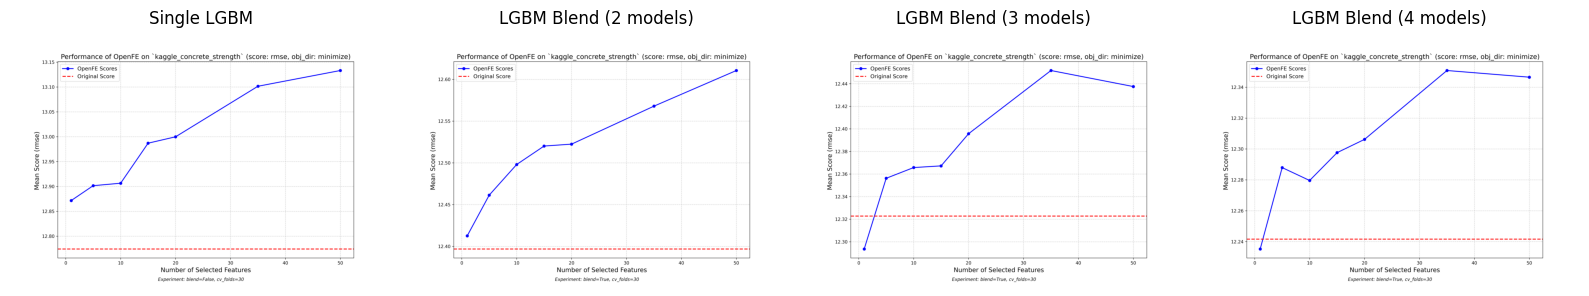

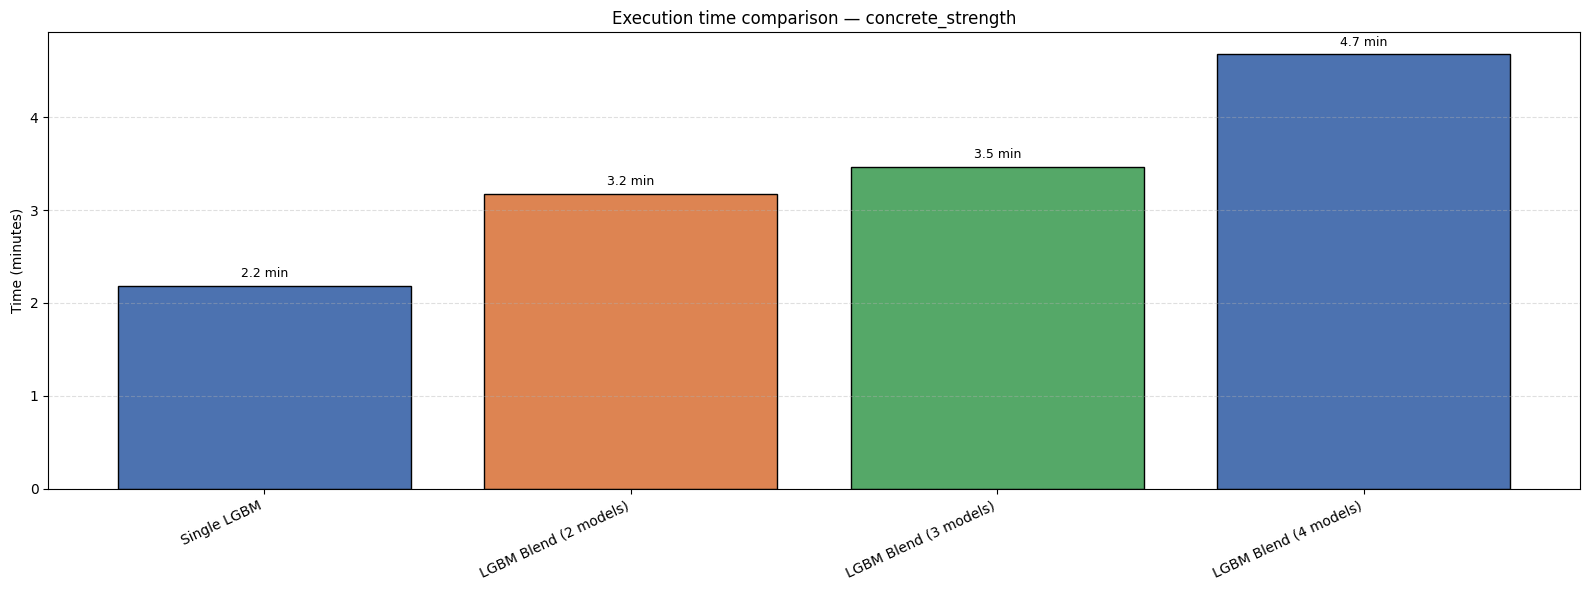



Comparing plots for dataset: rainfall


## OpenFE rainfall - objective direction: maximize

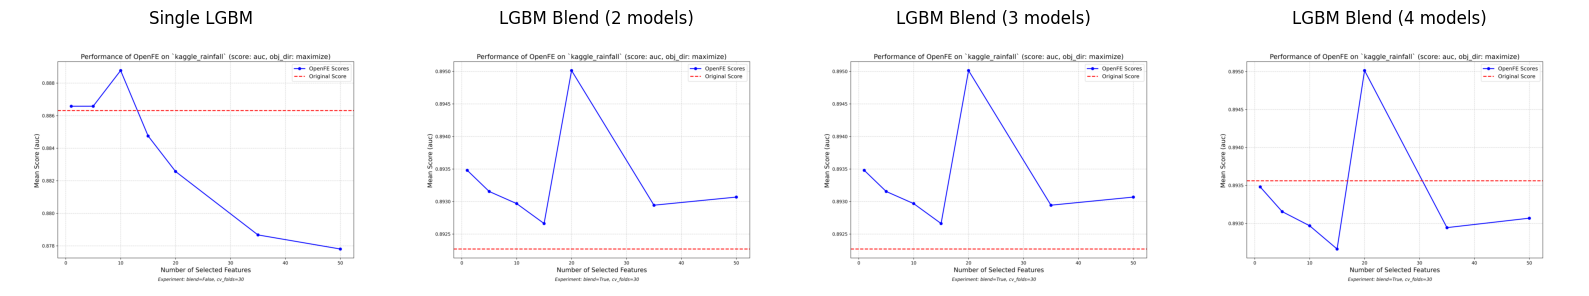

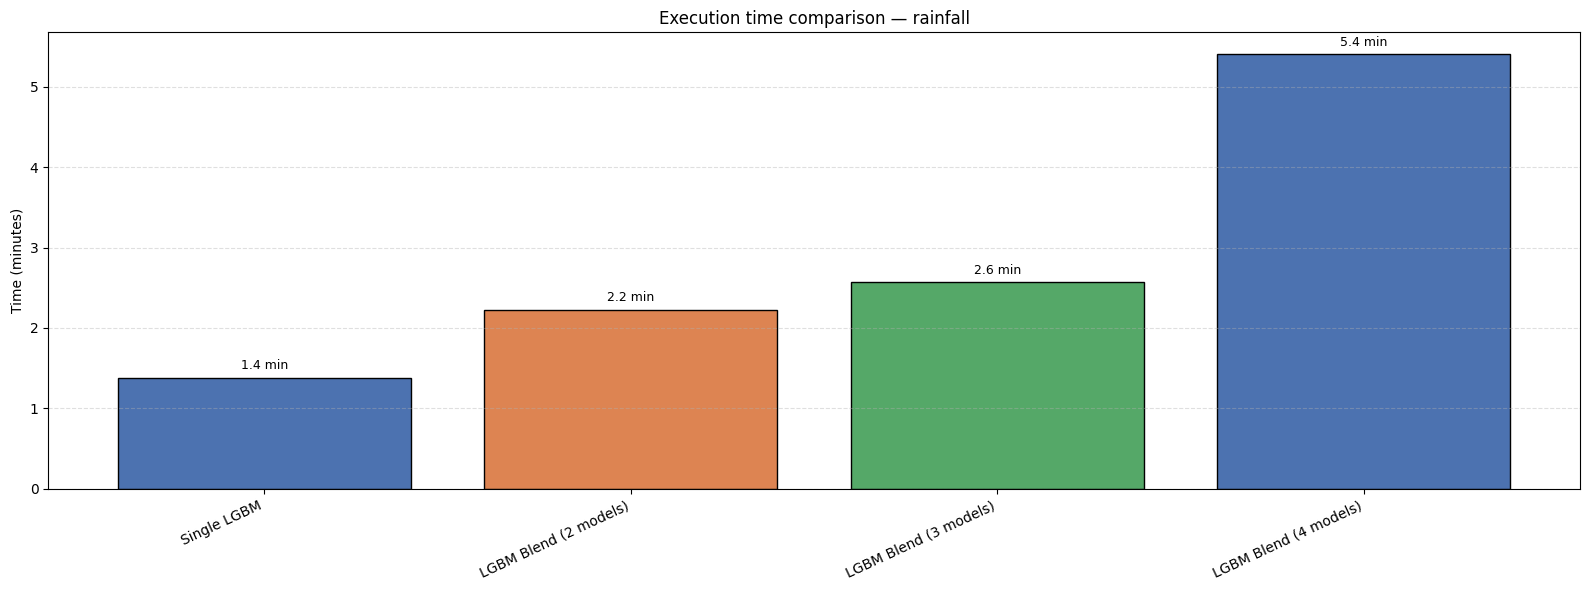



Comparing plots for dataset: wine_quality


## OpenFE wine_quality - objective direction: maximize

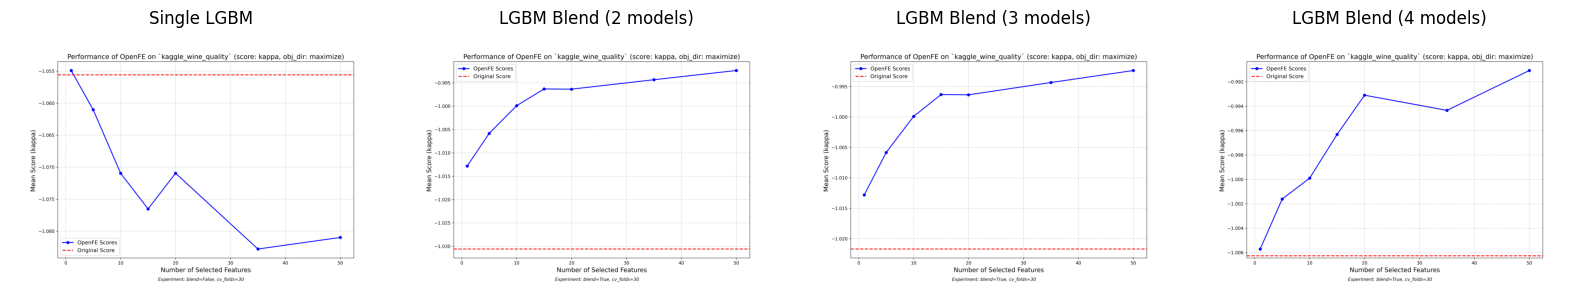

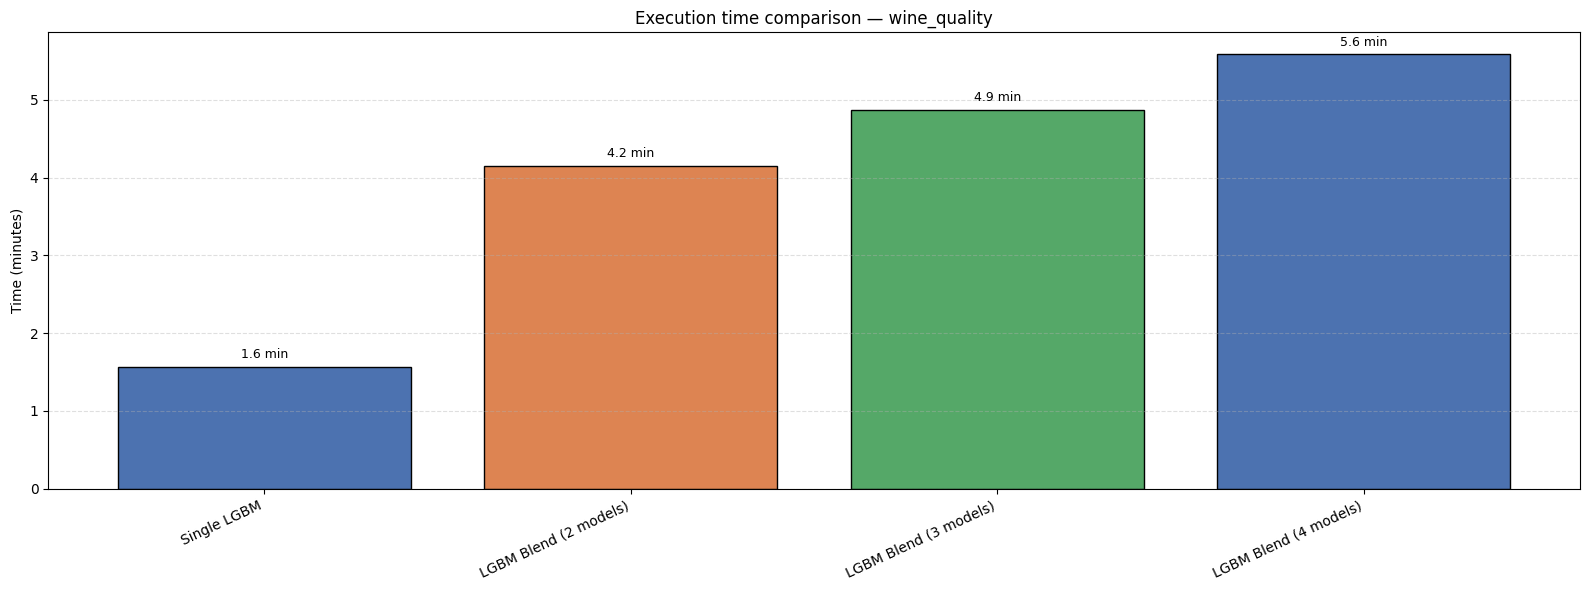



Comparing plots for dataset: employee_attrition


## OpenFE employee_attrition - objective direction: maximize

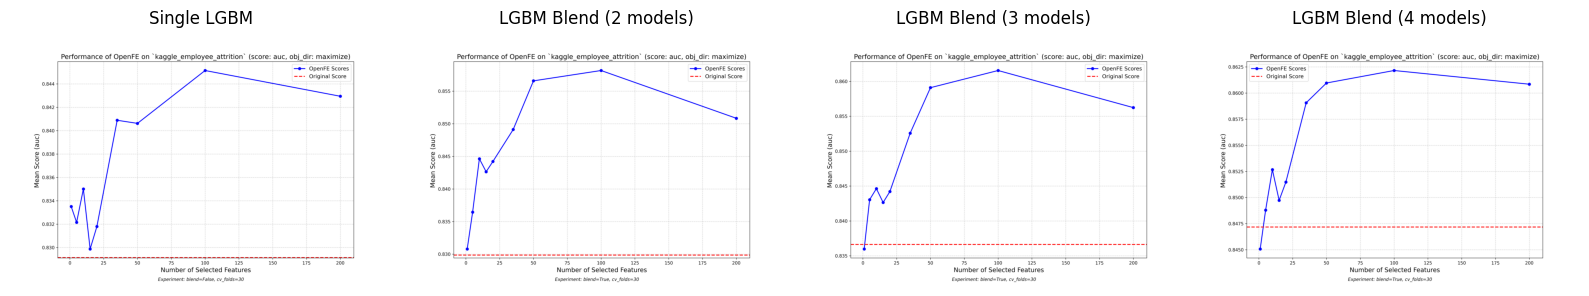

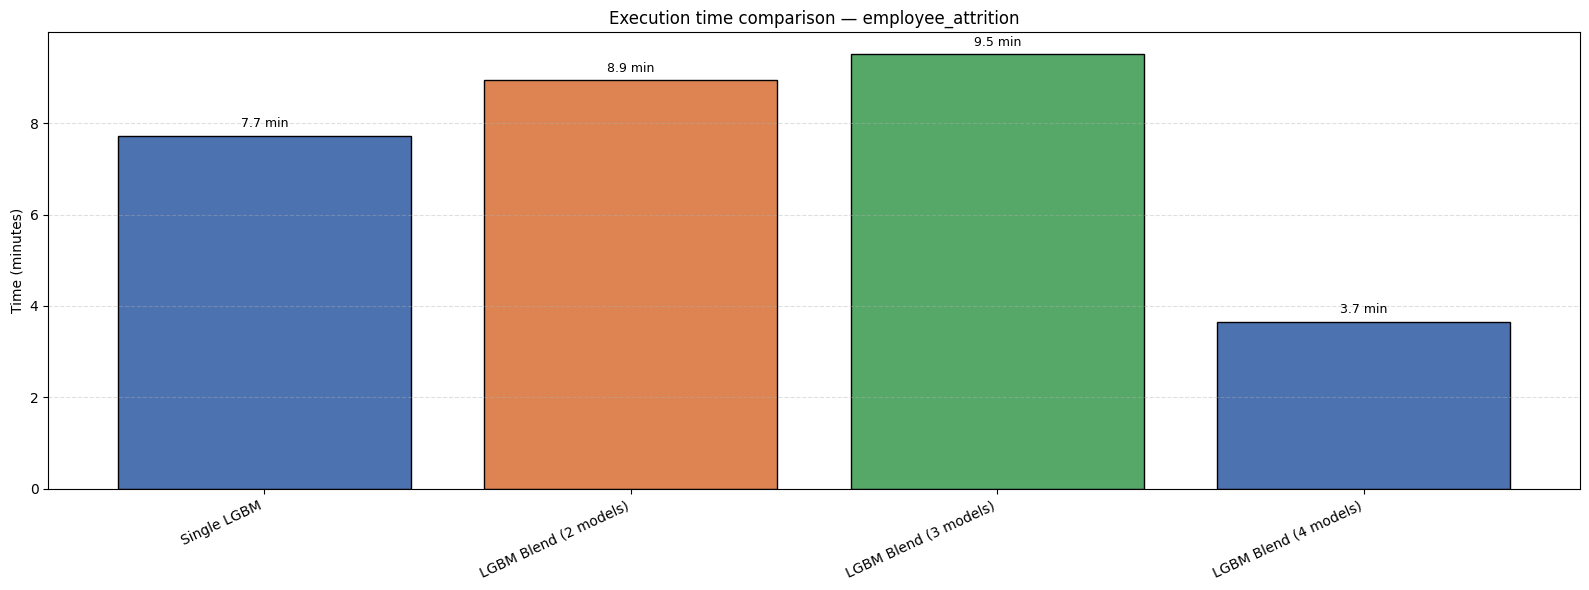



Comparing plots for dataset: blueberry_yield


## OpenFE blueberry_yield - objective direction: minimize

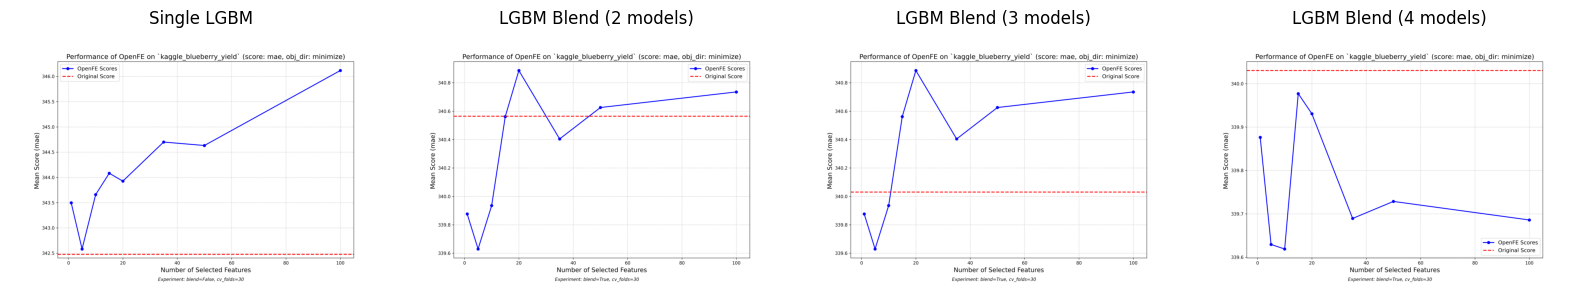

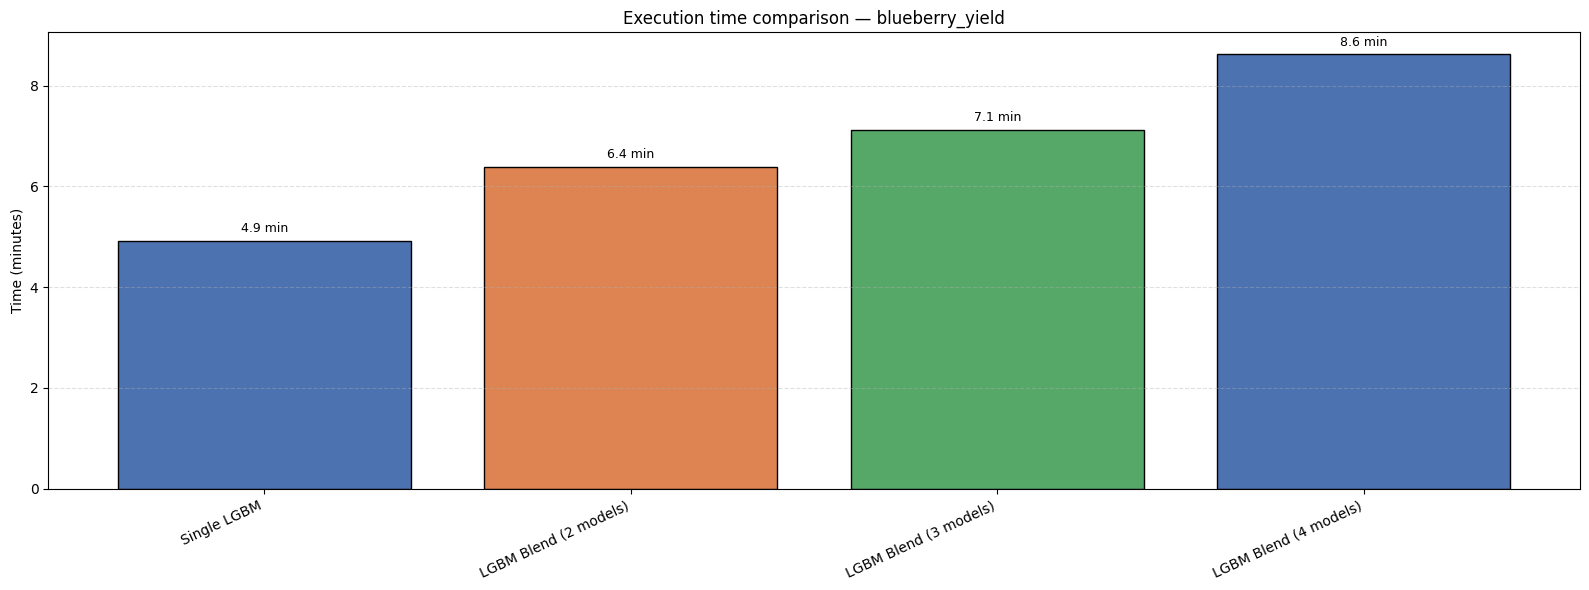



Comparing plots for dataset: heat_flux


## OpenFE heat_flux - objective direction: minimize

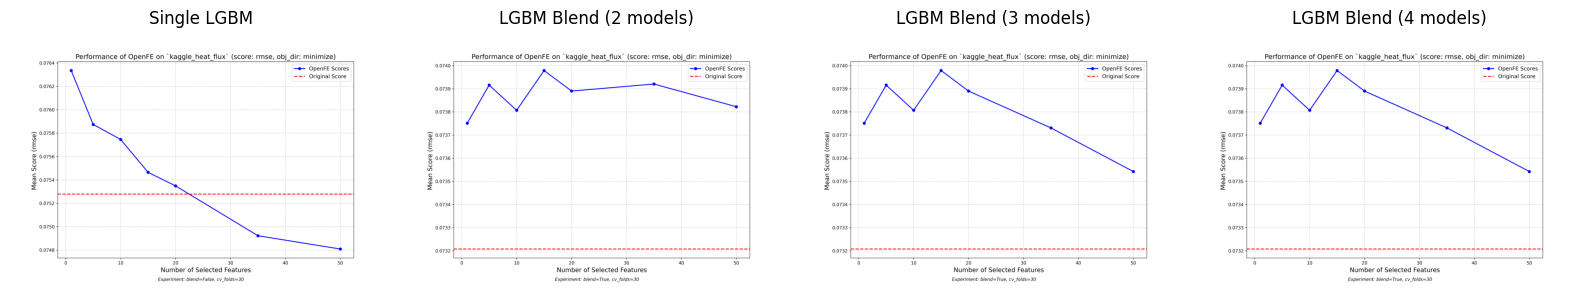

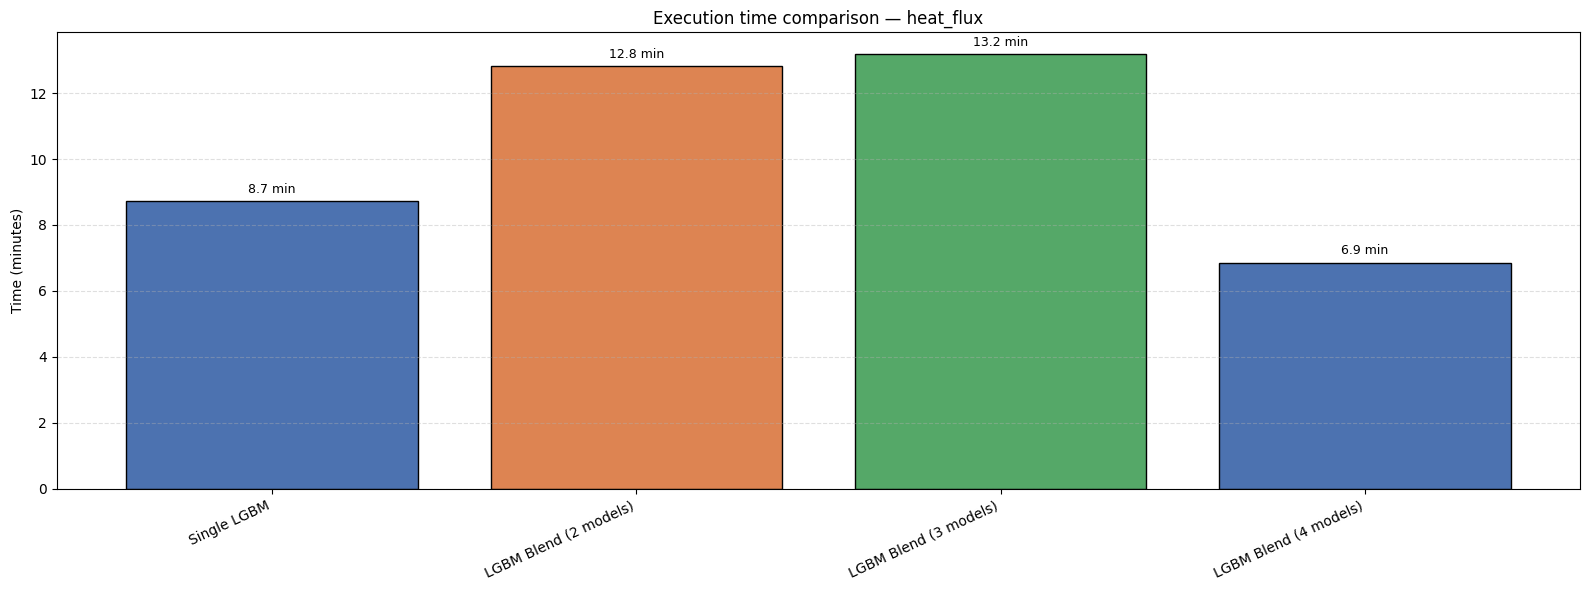



Comparing plots for dataset: abalone


## OpenFE abalone - objective direction: minimize

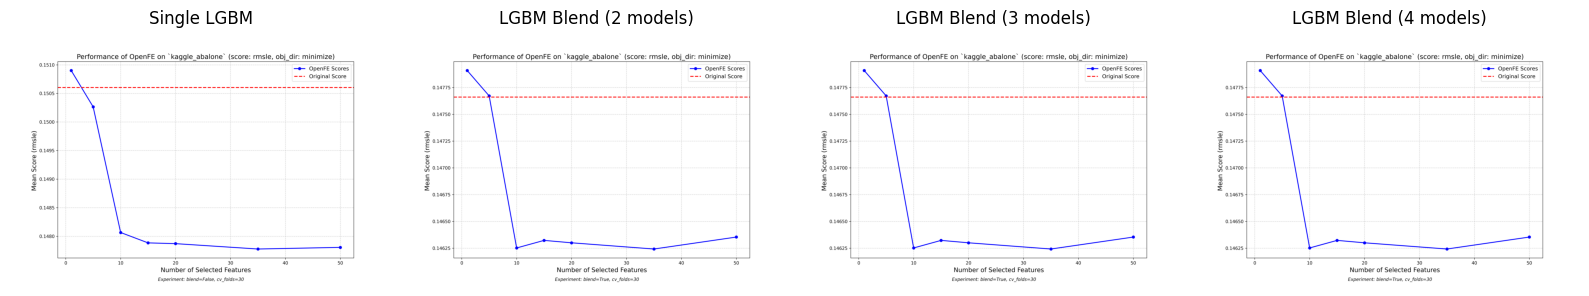

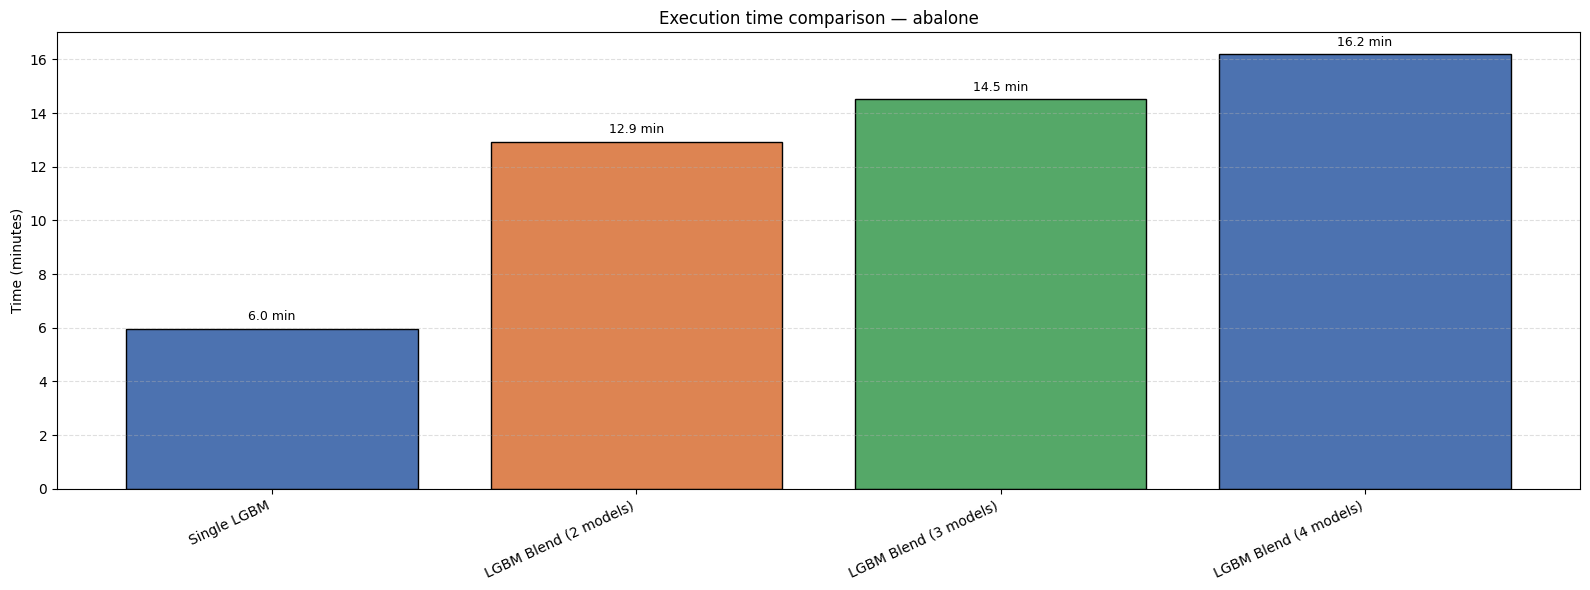



Comparing plots for dataset: mohs_hardness


## OpenFE mohs_hardness - objective direction: minimize

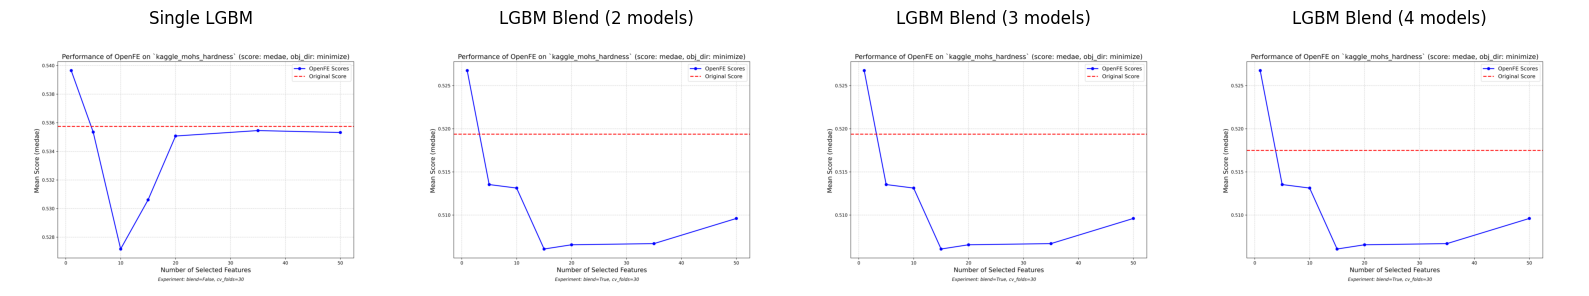

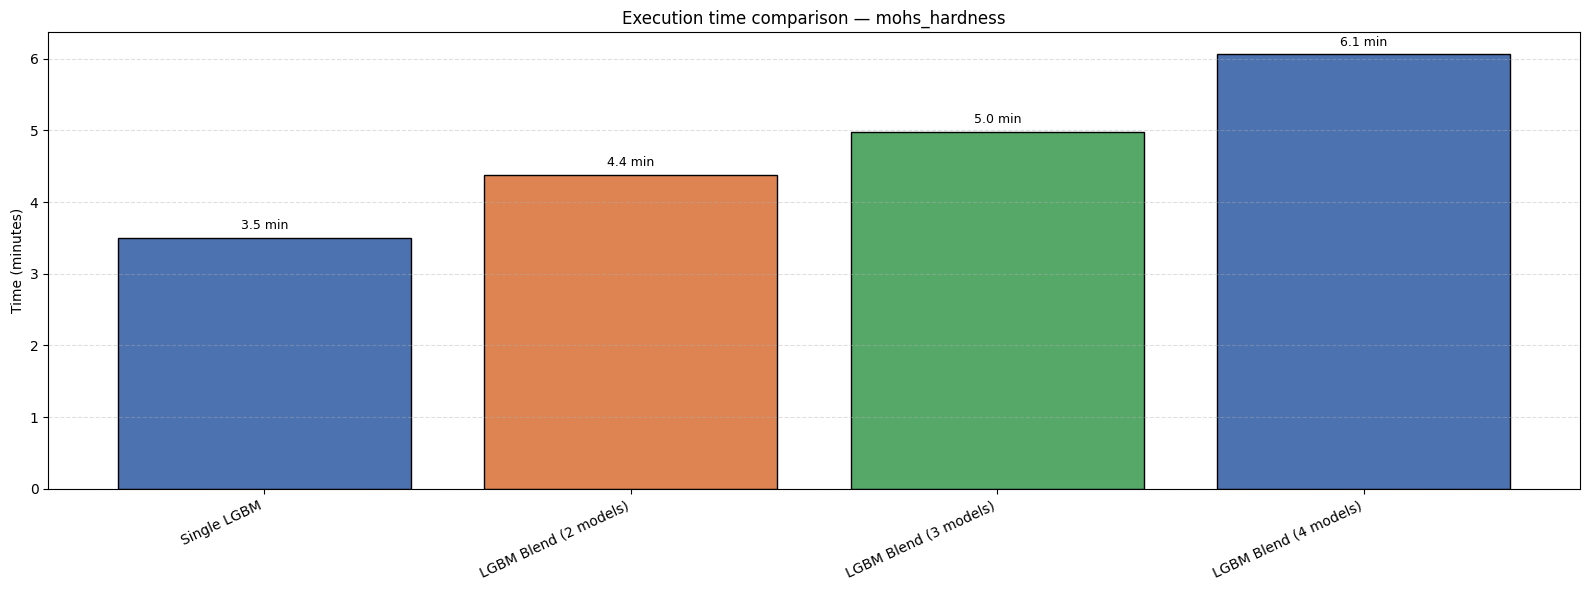



Comparing plots for dataset: crab_age


## OpenFE crab_age - objective direction: minimize

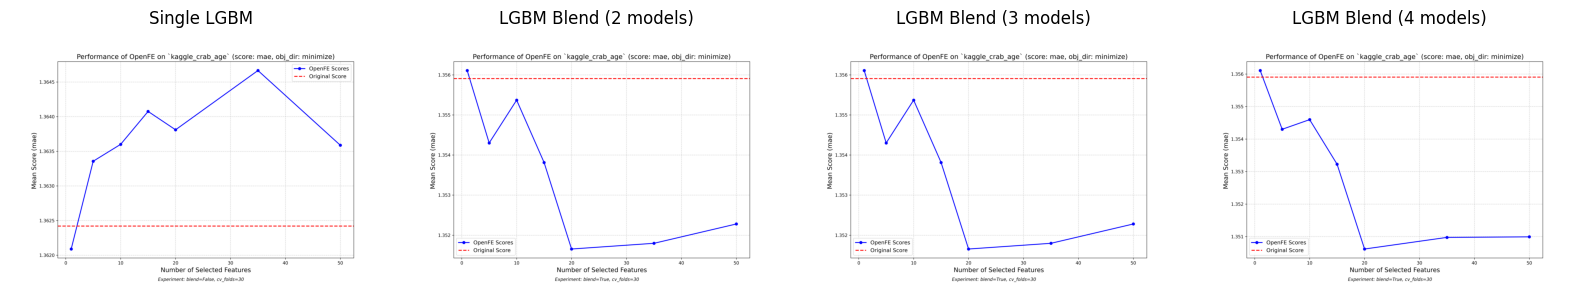

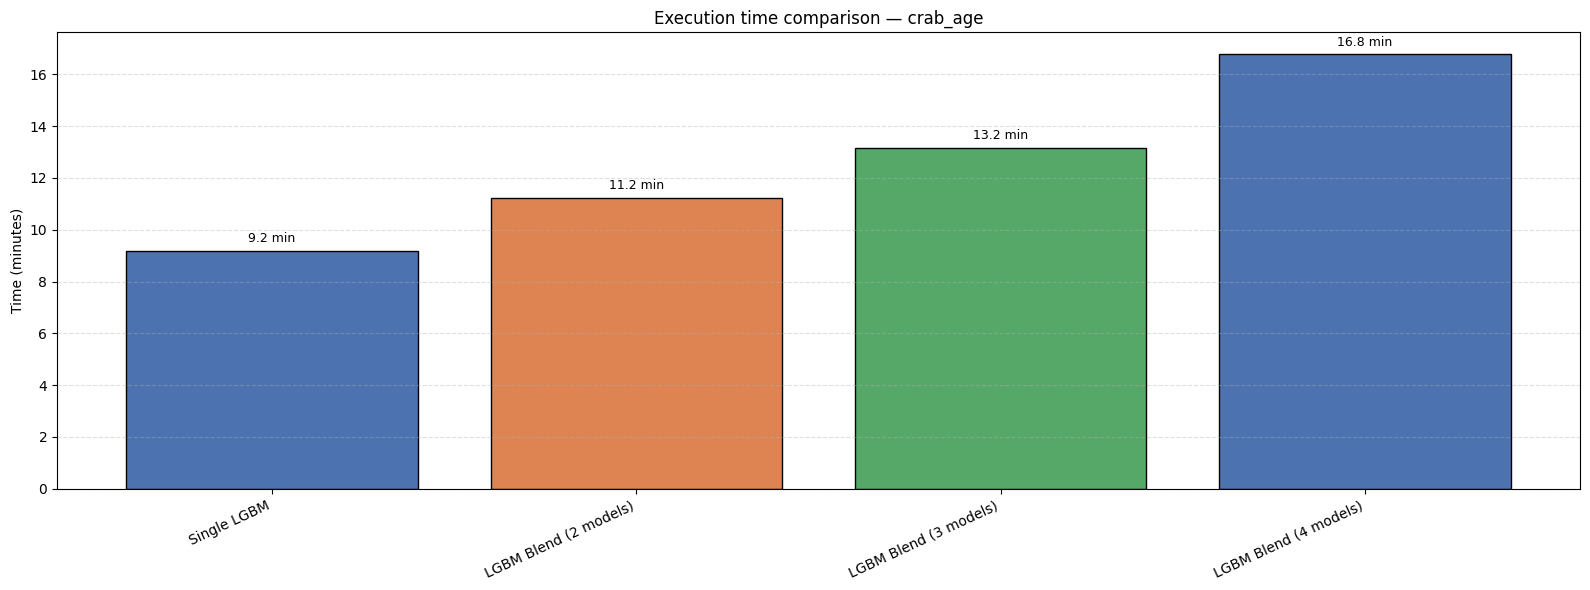



Comparing plots for dataset: housing_price_california


## OpenFE housing_price_california - objective direction: minimize

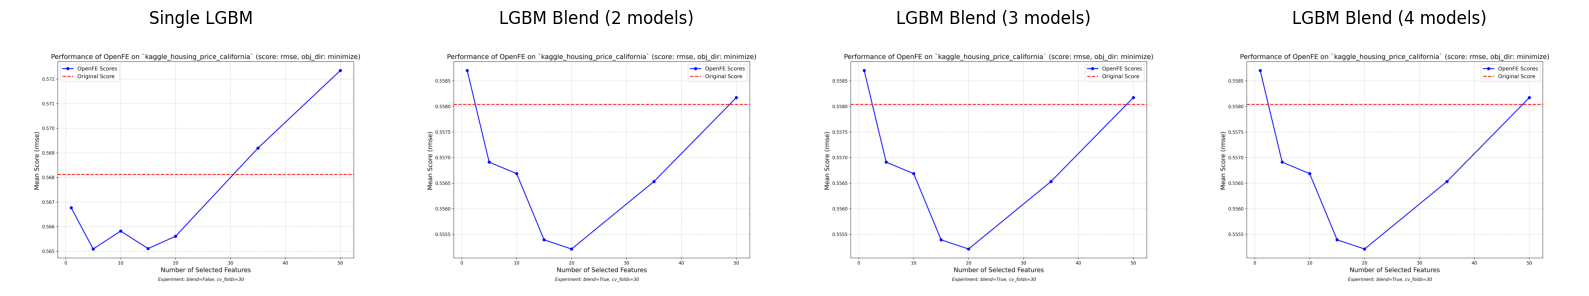

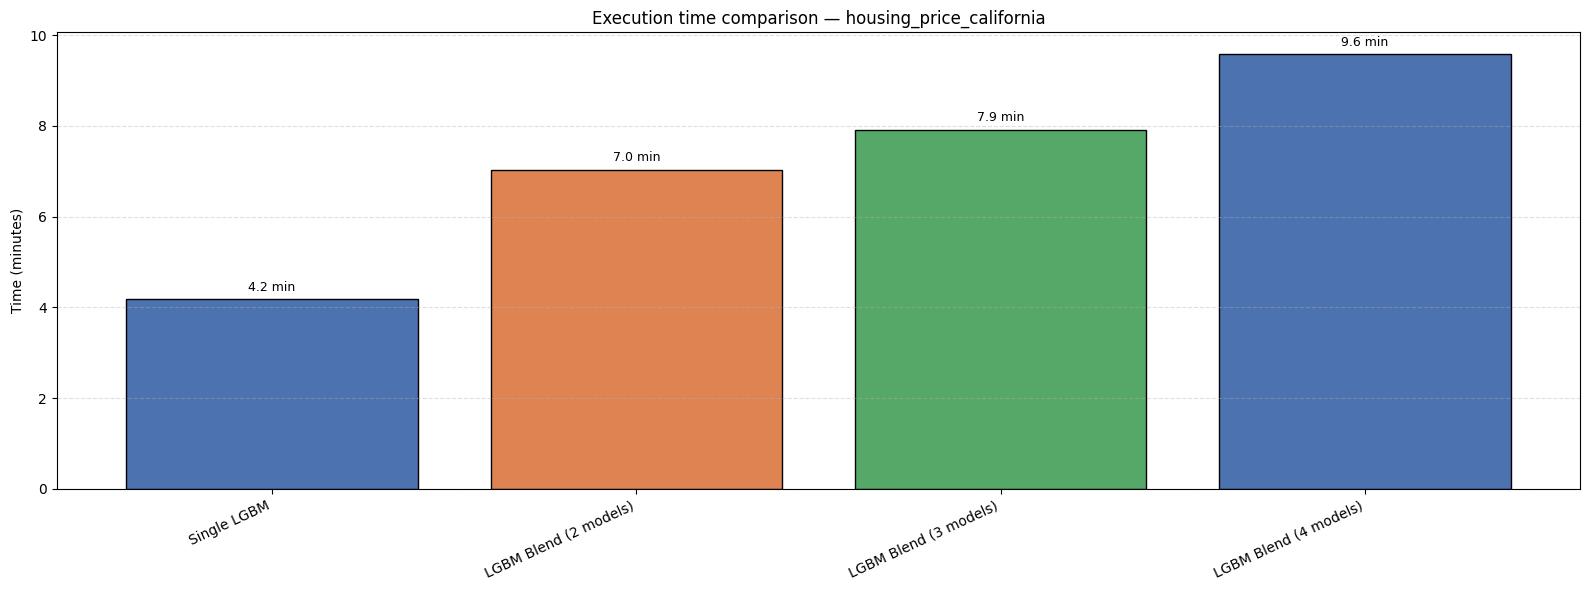



Comparing plots for dataset: influencer


## OpenFE influencer - objective direction: maximize

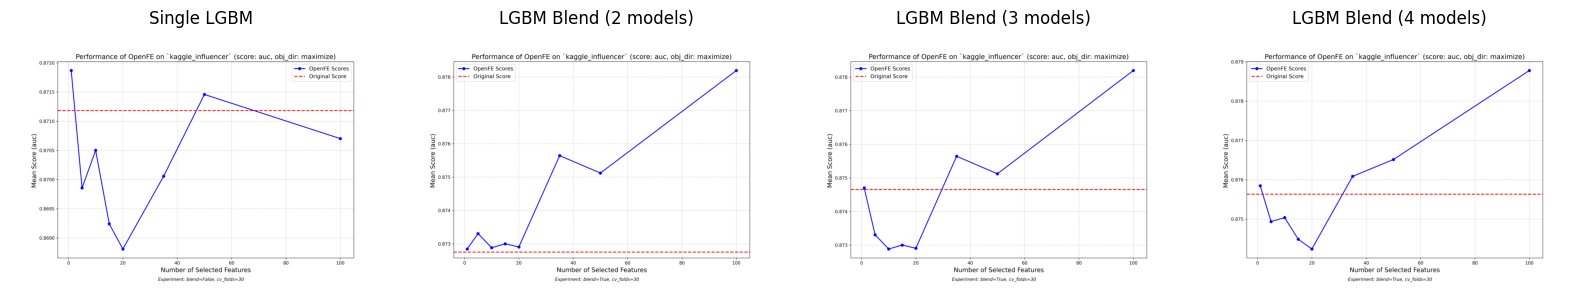

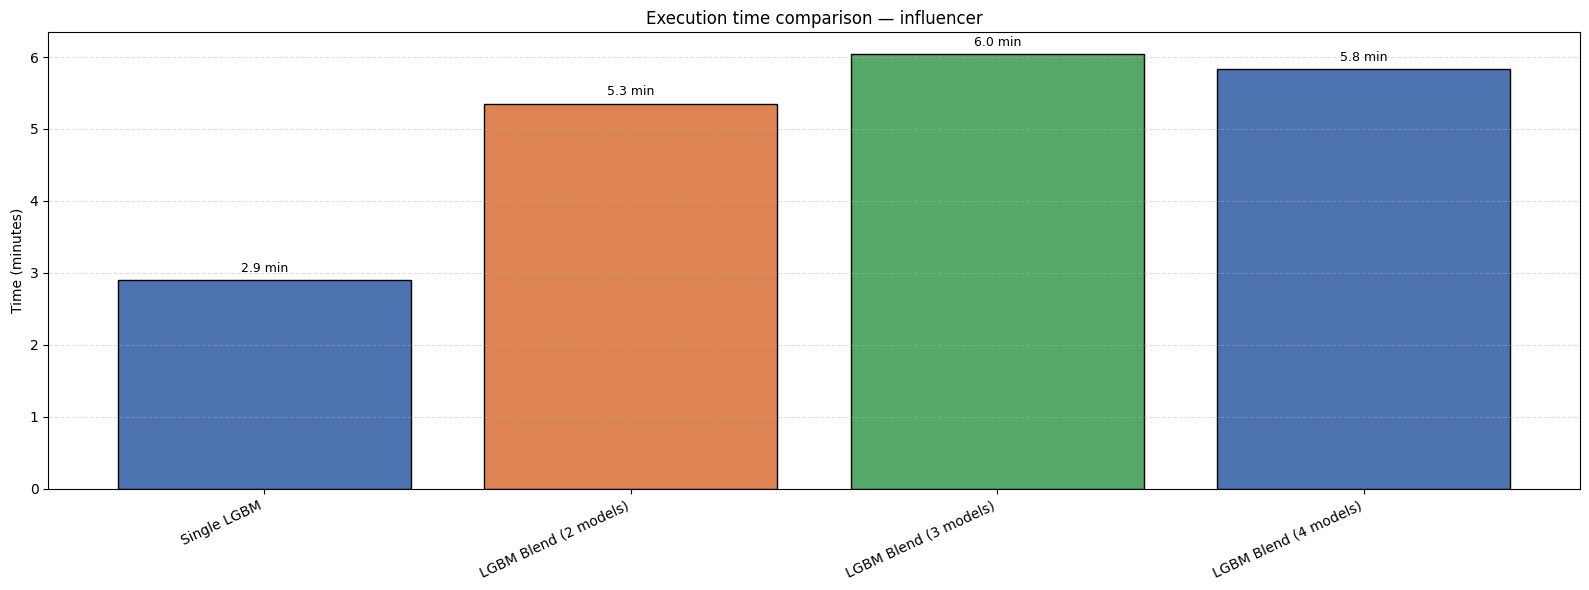



Comparing plots for dataset: cirrhosis_outcomes


## OpenFE cirrhosis_outcomes - objective direction: minimize

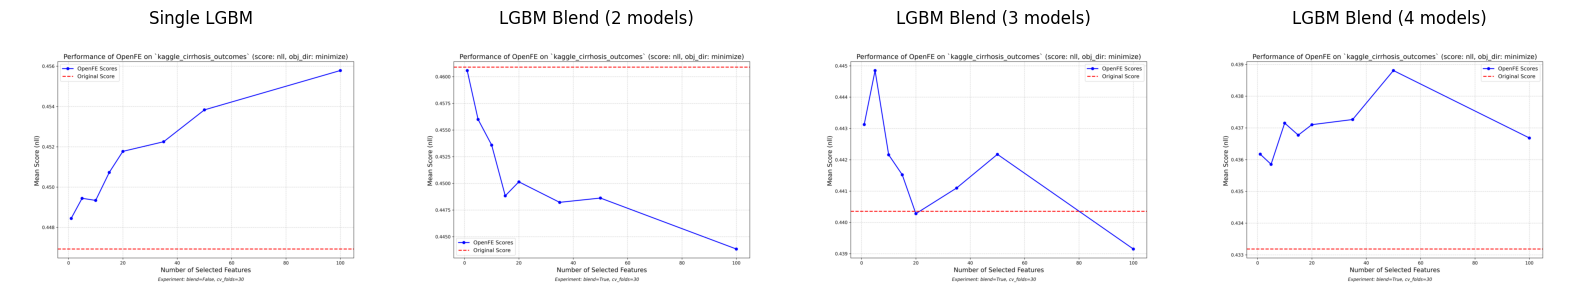

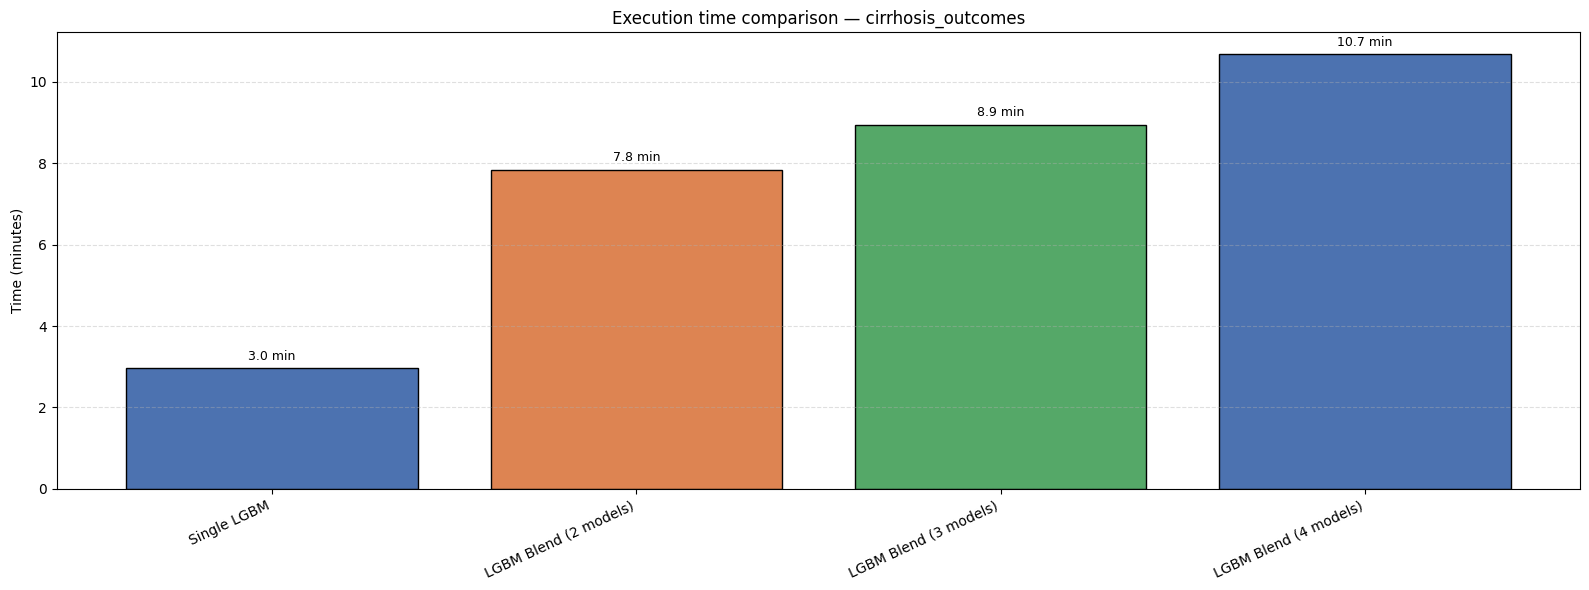



Comparing plots for dataset: sticker_sales
An error occurred while processing sticker_sales: [Errno 2] No such file or directory: '../openfe_experiments/openfe_kaggle_sticker_sales_10k_mcf_2_db_fb_False_grid_search_v2/kaggle_sticker_sales/experiment_metadata.json'


Comparing plots for dataset: reservation_cancellation


## OpenFE reservation_cancellation - objective direction: maximize

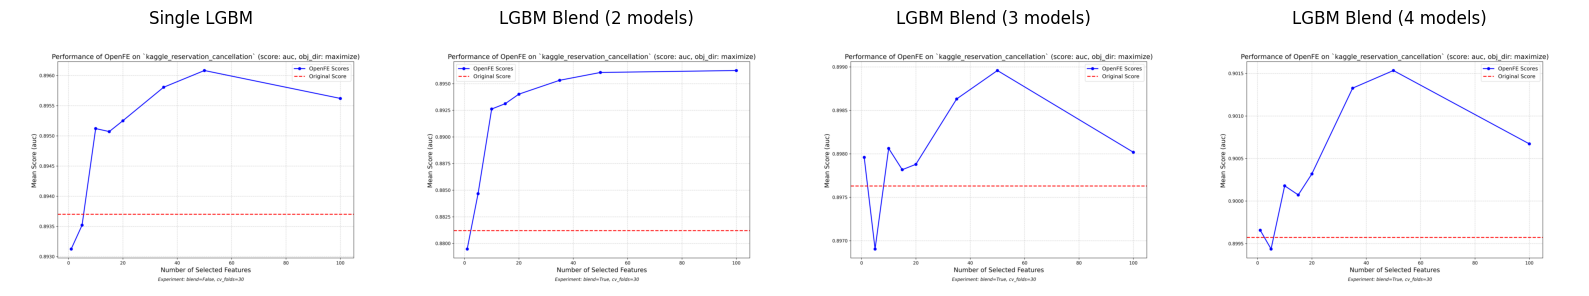

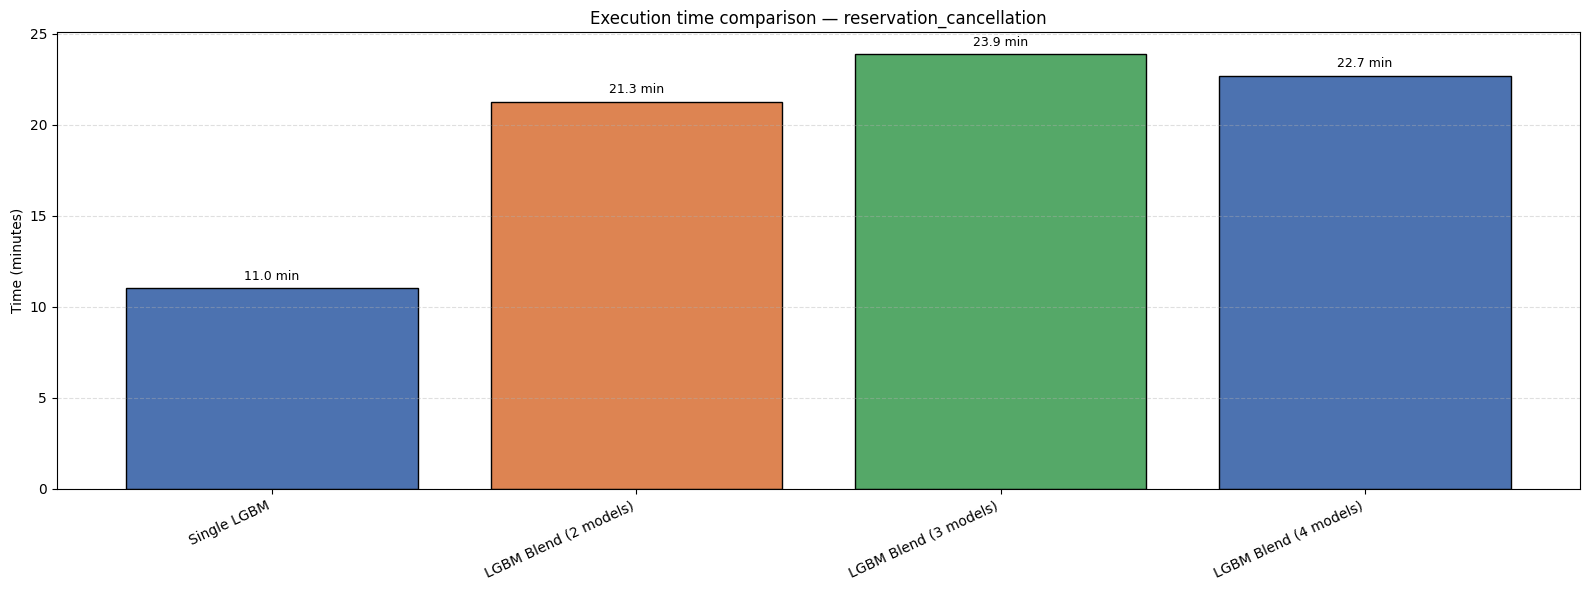



Comparing plots for dataset: obesity_risk


## OpenFE obesity_risk - objective direction: maximize

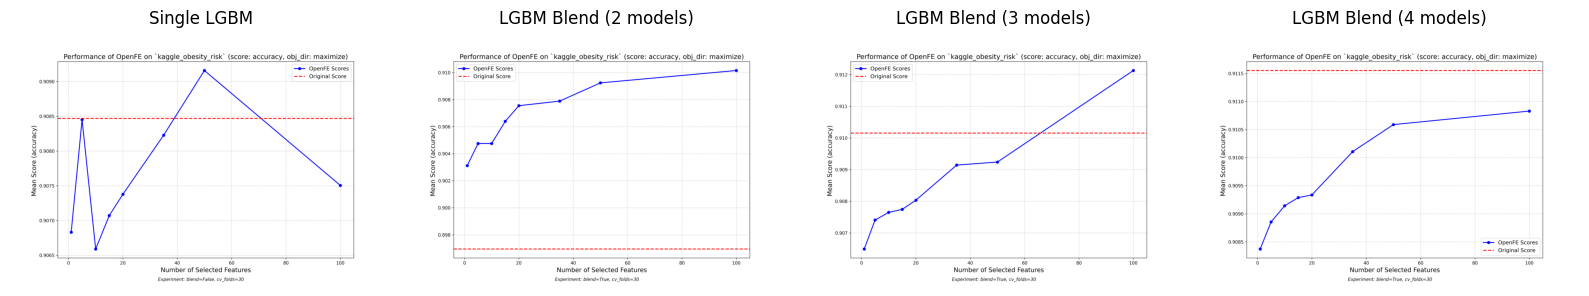

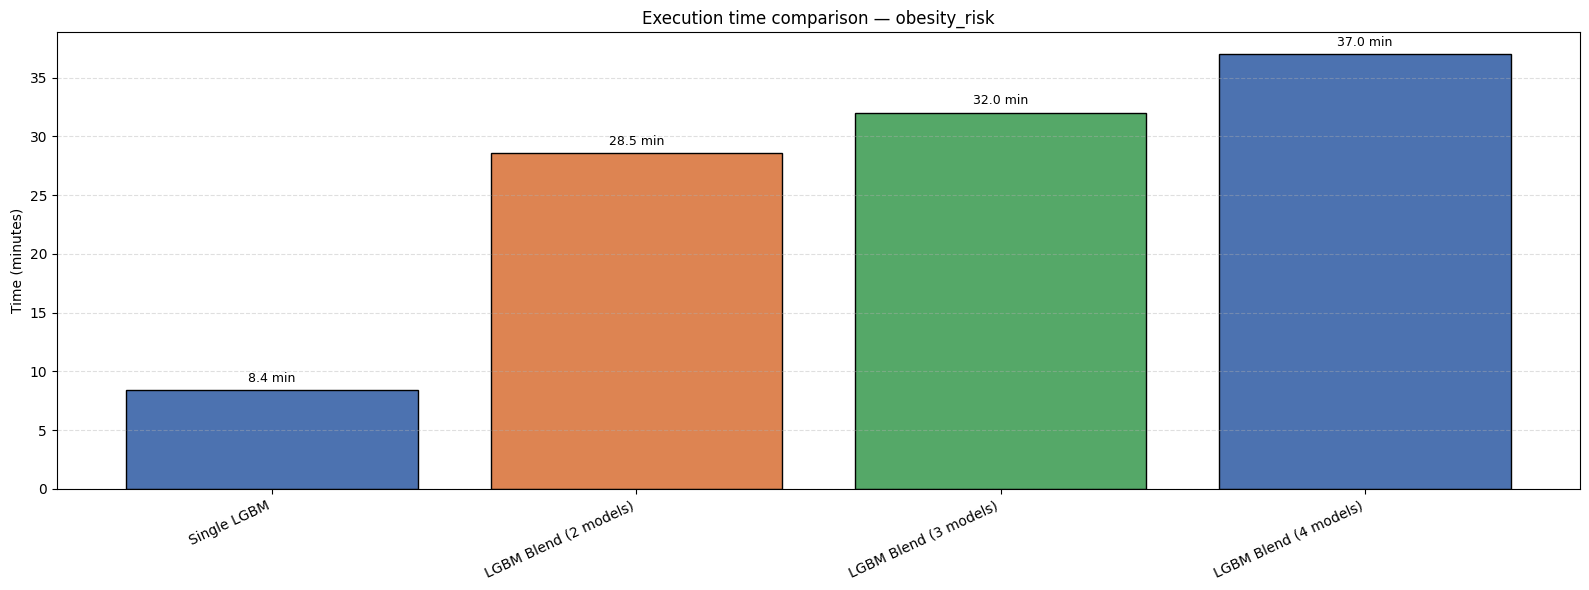



Comparing plots for dataset: loan_approval


## OpenFE loan_approval - objective direction: maximize

In [ ]:
versions = ['v2', 'blend_2_models_v2', 'blend_3_models_v2', 'blend_4_models_v2']
titles = ['Single LGBM', 'LGBM Blend (2 models)', 'LGBM Blend (3 models)', 'LGBM Blend (4 models)']

for data_name in datasets:
    try:
        print(f"\n\nComparing plots for dataset: {data_name}")
        base_path_list = get_base_paths(data_name, versions_list=versions)
        plots_path_list = get_both_plots(path_list=base_path_list)
        metadata_list = get_both_metadata(path_list=base_path_list)
        obj_direction = metadata_list[0]["objective_direction"]
        compare_plots(data_name, obj_direction=obj_direction, plots_path_list=plots_path_list, titles_list=titles)
        compare_execution_times(data_name, metadata_list=metadata_list, titles_list=titles)
    except Exception as e:
        print(f"An error occurred while processing {data_name}: {e}")